In [52]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [20]:
data_path = "D:\!!!MAAykanat Dosyalar\MAA_Own_Study\organised_data_final.csv"

In [21]:
solar_energy_data = pd.read_csv(data_path, sep=";")

In [22]:
solar_energy_data.head()

,YEAR,MONTH,DAY,HOUR,WDS,MXT,MNT,TMP,PRC,PRS,RLH,SSI,GSR,OUP
0,2016,6,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2016,6,17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2016,6,17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2016,6,17,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2016,6,17,4,NaN,44754.0,44753.0,44693.0,0.0,848.3,80.0,0.0,0.0,0.0


In [30]:
solar_energy_data.describe()

,YEAR,MONTH,DAY,HOUR,WDS,MXT,MNT,TMP,PRC,PRS,RLH,SSI,GSR,OUP
count,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,10032.000000,1.003200e+04
mean,2016.526316,6.571770,15.787081,11.500000,31732.010083,31126.676023,30597.777546,31029.242448,254.761740,846.087287,55.252245,5536.597367,2161.611744,1.628303e+05
std,0.499332,3.232158,8.864925,6.922532,18055.436246,19319.868783,19527.123498,19161.012722,3080.958103,3.445537,21.508504,13457.388970,8796.565118,2.888152e+05
min,2016.000000,1.000000,1.000000,0.000000,0.000000,-19.600000,-20.900000,-20.600000,0.000000,831.700000,5.000000,0.000000,0.000000,0.000000e+00
25%,2016.000000,4.000000,8.000000,5.750000,31732.010083,32.200000,21.000000,31.900000,0.000000,844.100000,39.750000,0.000000,0.000000,0.000000e+00
50%,2017.000000,7.000000,16.000000,11.500000,44564.000000,44608.000000,44606.000000,44606.000000,0.000000,846.100000,55.252245,19.845000,82.200000,4.592200e+02
75%,2017.000000,9.000000,23.000000,17.250000,44682.000000,44721.000000,44721.000000,44717.000000,0.000000,848.200000,71.000000,75.200000,606.525000,1.628303e+05
max,2017.000000,12.000000,31.000000,23.000000,44812.000000,44834.000000,44834.000000,44834.000000,44809.000000,856.300000,100.000000,47453.000000,44834.000000,1.000828e+06


In [24]:
# As it can see below, data has numeric values. It is better to approach regression problem to predict OUP

In [23]:
solar_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    10032 non-null  int64  
 1   MONTH   10032 non-null  int64  
 2   DAY     10032 non-null  int64  
 3   HOUR    10032 non-null  int64  
 4   WDS     7964 non-null   float64
 5   MXT     8867 non-null   float64
 6   MNT     8867 non-null   float64
 7   TMP     8686 non-null   float64
 8   PRC     8416 non-null   float64
 9   PRS     9848 non-null   float64
 10  RLH     8686 non-null   float64
 11  SSI     9458 non-null   float64
 12  GSR     9443 non-null   float64
 13  OUP     9469 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


In [26]:
# Data has some missing value almost in each features.

In [25]:
solar_energy_data.isnull().sum()

YEAR        0
MONTH       0
DAY         0
HOUR        0
WDS      2068
MXT      1165
MNT      1165
TMP      1346
PRC      1616
PRS       184
RLH      1346
SSI       574
GSR       589
OUP       563
dtype: int64

In [27]:
solar_energy_data['WDS']=solar_energy_data['WDS'].fillna(solar_energy_data['WDS'].mean())
solar_energy_data['MXT']=solar_energy_data['MXT'].fillna(solar_energy_data['MXT'].mean())
solar_energy_data['MNT']=solar_energy_data['MNT'].fillna(solar_energy_data['MNT'].mean())
solar_energy_data['TMP']=solar_energy_data['TMP'].fillna(solar_energy_data['TMP'].mean())
solar_energy_data['PRC']=solar_energy_data['PRC'].fillna(solar_energy_data['PRC'].mean())
solar_energy_data['PRS']=solar_energy_data['PRS'].fillna(solar_energy_data['PRS'].mean())
solar_energy_data['RLH']=solar_energy_data['RLH'].fillna(solar_energy_data['RLH'].mean())
solar_energy_data['SSI']=solar_energy_data['SSI'].fillna(solar_energy_data['SSI'].mean())
solar_energy_data['GSR']=solar_energy_data['GSR'].fillna(solar_energy_data['GSR'].mean())
solar_energy_data['OUP']=solar_energy_data['OUP'].fillna(solar_energy_data['OUP'].mean())

In [28]:
solar_energy_data.isnull().sum()

YEAR     0
MONTH    0
DAY      0
HOUR     0
WDS      0
MXT      0
MNT      0
TMP      0
PRC      0
PRS      0
RLH      0
SSI      0
GSR      0
OUP      0
dtype: int64

In [31]:
input_features = ['WDS', 'MXT', 'MNT', 'TMP', 'PRC', 'PRS', 'RLH', 'SSI', 'GSR']
X = solar_energy_data[input_features]
y = solar_energy_data[['OUP']]

In [34]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.10)

In [41]:
dtr = DecisionTreeRegressor()

print(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=42, splitter='best')

DecisionTreeRegressor()


DecisionTreeRegressor(criterion='mse', random_state=42)

In [42]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [43]:
score = dtr.score(xtrain,ytrain)
print("R-squared: ", score)

R-squared:  0.9920786147343787


In [50]:
ypred = dtr.predict(xtest)

mse_dtr = mean_squared_error(ytest,ypred)
print("MSE: ", mse_dtr)
print("RMSE: ", math.sqrt(mse_dtr))

MSE:  72303622793.36095
RMSE:  268893.3297673279


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

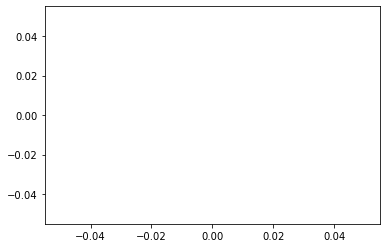

In [59]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest.iloc[:,:-1].values, linewidth=1, label="original")
plt.plot(x_ax, ypred.iloc[:,:-1].values, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 